In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("full_reward.csv")
df = df[["train/global_step", "steptr_genearl - train/reward"]]
df.columns = ["step", "reward"]

# (2) 이동 평균 계산(윈도우=50) 및 step ≤ 1100 필터링
window_size = 50
df['ma'] = df['reward'].rolling(window=window_size).mean()
df_lim = df[df['step'] <= 1100].dropna(subset=['ma'])

slopes = []
for end in range(50, 1101, 50):
    segment = df_lim[df_lim['step'] <= end]
    if len(segment) < 2:
        continue
    coef = np.polyfit(segment['step'], segment['ma'], 1)
    slope = coef[0]
    slopes.append((end, slope))

slopes_df = pd.DataFrame(slopes, columns=['end_step', 'slope'])

from kneed import KneeLocator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (1)-(3)은 기존과 동일하게 slopes_df를 생성했다고 가정합니다.
x = slopes_df['end_step'].values
y = slopes_df['slope'].values

# — 첫 번째 엘보우
kl1 = KneeLocator(x, y, curve='convex', direction='decreasing')
knee1_x, knee1_y = kl1.knee, kl1.knee_y
print(f"1st elbow at step={knee1_x}, slope={knee1_y:.6f}")

# — 두 번째 엘보우: 첫 번째 이후 구간만 잘라내서 재탐색
mask = x > knee1_x
x2, y2 = x[mask], y[mask]

kl2 = KneeLocator(x2, y2, curve='convex', direction='decreasing')
knee2_x, knee2_y = kl2.knee, kl2.knee_y
print(f"2nd elbow at step={knee2_x}, slope={knee2_y:.6f}")

1st elbow at step=150, slope=0.000664
2nd elbow at step=600, slope=0.000233


1st elbow at step=150, slope=0.000664
2nd elbow at step=600, slope=0.000233


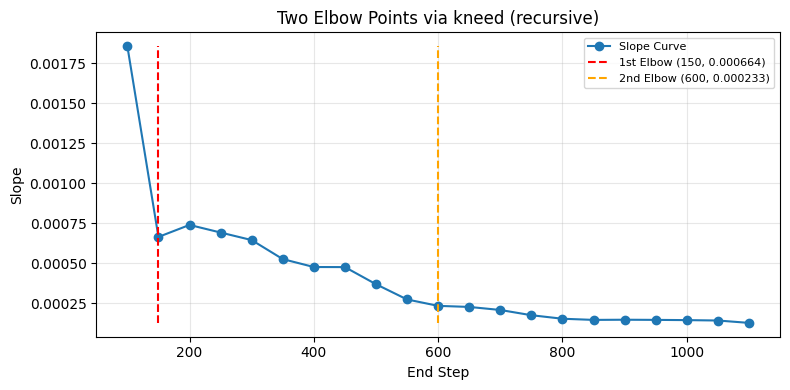

In [2]:
from kneed import KneeLocator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (1)-(3)은 기존과 동일하게 slopes_df를 생성했다고 가정합니다.
x = slopes_df['end_step'].values
y = slopes_df['slope'].values

# — 첫 번째 엘보우
kl1 = KneeLocator(x, y, curve='convex', direction='decreasing')
knee1_x, knee1_y = kl1.knee, kl1.knee_y
print(f"1st elbow at step={knee1_x}, slope={knee1_y:.6f}")

# — 두 번째 엘보우: 첫 번째 이후 구간만 잘라내서 재탐색
mask = x > knee1_x
x2, y2 = x[mask], y[mask]

kl2 = KneeLocator(x2, y2, curve='convex', direction='decreasing')
knee2_x, knee2_y = kl2.knee, kl2.knee_y
print(f"2nd elbow at step={knee2_x}, slope={knee2_y:.6f}")

# — 시각화
plt.figure(figsize=(8,4))
plt.plot(x, y, 'o-', label='Slope Curve')
# 1st elbow
plt.vlines(knee1_x, y.min(), y.max(), linestyles='--', colors='red',
           label=f'1st Elbow ({knee1_x}, {knee1_y:.6f})')
# 2nd elbow
plt.vlines(knee2_x, y.min(), y.max(), linestyles='--', colors='orange',
           label=f'2nd Elbow ({knee2_x}, {knee2_y:.6f})')

# 옵션: KneeLocator의 plot_knee()로도 각각 시각화 가능
# kl1.plot_knee(); kl2.plot_knee()

plt.xlabel('End Step')
plt.ylabel('Slope')
plt.title('Two Elbow Points via kneed (recursive)')
plt.legend(fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()